In [1]:
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

# 1 Consumir Dados da url

In [15]:
def lerAPI(url, qtd):  
    if url[-1:] != "/" : 
        url = url + "/?results={}".format(qtd)
    else:
        url = url + "?results={}".format(qtd)       
    return rq.get(url)   

def jsontodf(respon):
    x = respon.json()
    return pd.json_normalize(x, record_path=['results'])


# 2 Armazenar dados em CSV

In [17]:
# dados planos
conteudo = lerAPI("https://randomuser.me/api", 500)
df = jsontodf(conteudo)

In [20]:
dfcsv=pd.concat([df['gender'],dfname,dfloc,df['email'],dflogin,dfdob,df['phone'],df['cell'],dfreg,dfid,dfpict,df['nat']],axis=1)

In [22]:
df.head(5)

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,...,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,female,annerose.heintz@example.com,01084376139,01712712221,DE,Ms,Annerose,Heintz,8509,Meisenweg,...,1066d6c93fe5d906fa707f07d81e11698ee4697cce0852...,1997-01-30T03:04:36.870Z,26,2015-02-24T13:44:51.982Z,8,SVNR,82 290197 H 787,https://randomuser.me/api/portraits/women/74.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
1,female,sayali.nagane@example.com,7276734867,8120110068,IN,Miss,Sayali,Nagane,4011,Tilak Marg,...,da9d60ce09f0fca7c095fc4b9d03bf7a90bc168f61dce1...,1971-03-21T04:07:56.615Z,52,2003-12-22T11:32:28.907Z,19,UIDAI,199310652658,https://randomuser.me/api/portraits/women/51.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
2,male,hans-hinrich.schlegel@example.com,08202747773,01750519179,DE,Mr,Hans-Hinrich,Schlegel,4959,Kiefernweg,...,ba63ffaad260da0ff34ebc8f971a7884f63a5b408dcd88...,1985-01-28T18:15:32.781Z,38,2014-12-09T14:04:26.254Z,8,SVNR,64 280185 S 132,https://randomuser.me/api/portraits/men/43.jpg,https://randomuser.me/api/portraits/med/men/43...,https://randomuser.me/api/portraits/thumb/men/...
3,female,maria.chen@example.com,1265500443,8044728010,NZ,Miss,Maria,Chen,4460,Carlton Avenue,...,7cba4f9c9a0e6dd5c6405615f5614aff9aa4907b56462c...,1993-11-09T23:11:03.711Z,29,2003-09-26T23:15:06.791Z,19,,None,https://randomuser.me/api/portraits/women/1.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
4,male,svyatovid.kotlyar@example.com,067F583789,099R909272,UA,Mr,Svyatovid,Kotlyar,8878,Okolichna,...,276fd37de6c0c92c2e887eb07708ec620f2f46520d026f...,1946-12-28T16:02:59.148Z,76,2008-04-28T23:11:47.399Z,14,,None,https://randomuser.me/api/portraits/men/43.jpg,https://randomuser.me/api/portraits/med/men/43...,https://randomuser.me/api/portraits/thumb/men/...


In [19]:
df.to_csv('randomuser.csv', sep=',', encoding='utf-8')

# 3 Formato de telefone e celular, transformar em formato único arbitrario

In [26]:
def maskfone(df):
    # deixando apenas números
    df['phone'] = df['phone'].str.replace(r'[^0-9a-zA-Z:,]+', '', regex=True)
    # formato (nnnn)999-99999
    df['phone'] =  '(' + df['phone'].str[:3] + ')' + df['phone'].str[3:6] + '-' + df['phone'].str[6:11]
    df['cell'] = df['cell'].str.replace(r'[^0-9a-zA-Z:,]+', '', regex=True)
    df['cell'] =  '(' + df['cell'].str[:3] + ')' + df['cell'].str[3:6] + '-' + df['cell'].str[6:11]
    return df['cell']

#retirando de phone caracteres 'espaço' ( - )
#p = df['phone'].replace('\(','',regex=True)
#p = p.replace(' ','',regex=True)
#p = p.replace('\)','',regex=True)
#p = p.replace('-','',regex=True)


# 4 Agrupamento, porcentagem de usuários por país e gênero

<Axes: ylabel='city'>

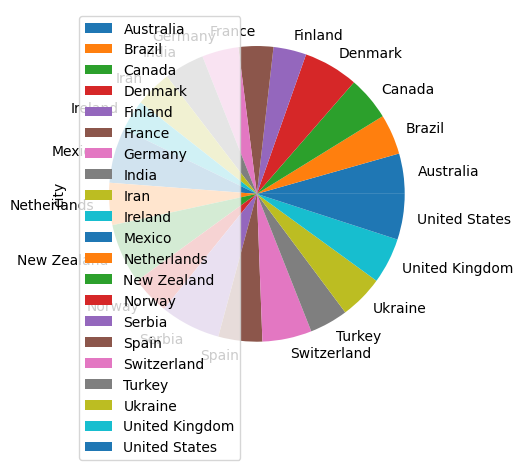

In [21]:
dfloc.groupby(['country']).count().plot(y='city',kind='pie')

In [160]:
#Agrupamento por gênero

In [174]:
#ordenar e contar por gênero
dfsex=df.sort_values(['gender'])
sex=dfsex.groupby(df['gender']).agg({'name':'count'})

In [175]:
sex.apply(lambda x:100 * x / float(x.sum()))

,name
gender,
female,49.8
male,50.2


<AxesSubplot:ylabel='name'>

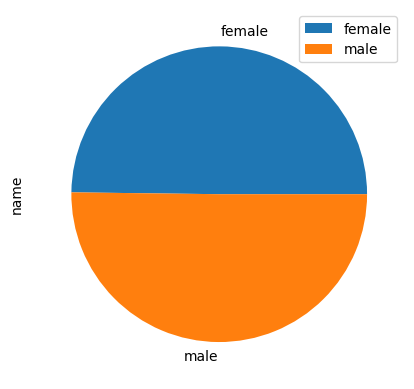

In [177]:
dfsex.groupby(['gender']).count().plot(y='name',kind='pie')

In [71]:
city.apply(lambda x:100 * x / float(x.sum()))

,name
nat,
AU,4.6
BR,3.2
CA,6.4
CH,5.0
DE,4.6
DK,4.6
ES,5.2
FI,2.8
FR,4.6


# 5 Analisando dados com agrupamento 

In [16]:
ctr=dfloc.groupby(['country','state']).count()

In [17]:
ctr.apply(lambda x:100 * x / float(x.sum()))

city  postcode  street.number  \
country       state                                                         
Australia     Australian Capital Territory   1.0       1.0            1.0   
              New South Wales                0.6       0.6            0.6   
              Northern Territory             0.4       0.4            0.4   
              Queensland                     0.4       0.4            0.4   
              South Australia                0.4       0.4            0.4   
...                                          ...       ...            ...   
United States South Carolina                 0.2       0.2            0.2   
              Tennessee                      0.4       0.4            0.4   
              Utah                           0.2       0.2            0.2   
              Vermont                        0.2       0.2            0.2   
              Wisconsin                      0.2       0.2            0.2   

                                            street.name  coordinates.latitude  \
country       state                                                             
Australia     Australian Capital Territory          1.0                   1.0   
              New South Wales                       0.6                   0.6   
              Northern Territory                    0.4                   0.4   
              Queensland                            0.4                   0.4   
              South Australia                       0.4                   0.4   
...                                                 ...                   ...   
United States South Carolina                        0.2                   0.2   
              Tennessee                             0.4                   0.4   
              Utah                                  0.2                   0.2   
              Vermont                               0.2                   0.2   
              Wisconsin                             0.2                   0.2   

                                            coordinates.longitude  \
country       state                                                 
Australia     Australian Capital Territory                    1.0   
              New South Wales                                 0.6   
              Northern Territory                              0.4   
              Queensland                                      0.4   
              South Australia                                 0.4   
...                                                           ...   
United States South Carolina                                  0.2   
              Tennessee                                       0.4   
              Utah                                            0.2   
              Vermont                                         0.2   
              Wisconsin                                       0.2   

                                            timezone.offset  \
country       state                                           
Australia     Australian Capital Territory              1.0   
              New South Wales                           0.6   
              Northern Territory                        0.4   
              Queensland                                0.4   
              South Australia                           0.4   
...                                                     ...   
United States South Carolina                            0.2   
              Tennessee                                 0.4   
              Utah                                      0.2   
              Vermont                                   0.2   
              Wisconsin                                 0.2   

                                            timezone.description  
country       state                                               
Australia     Australian Capital Territory                   1.0  
              New South Wales                                0.6  
  

# Total do Brasil e demais

In [22]:
dfbr = dfloc.query("country=='Brazil'")
#dfbr = dfloc.filter(like='Brazil',axis=0)

In [23]:
dfbr.groupby(['country','state']).sum(numeric_only=True)

street.number
country state                             
Brazil  Acre                          3697
        Alagoas                       5401
        Bahia                          998
        Ceará                         4810
        Goiás                         9961
        Maranhão                      5888
        Mato Grosso                   4761
        Mato Grosso do Sul            5736
        Paraná                        2193
        Paraíba                       4435
        Pará                         18356
        Pernambuco                    8369
        Piauí                         7669
        Rio Grande do Norte           3708
        Rio Grande do Sul            10606
        Roraima                      12027
        Santa Catarina                1440
        Tocantins                     4332

In [24]:
dfloc.groupby(['country']).sum(numeric_only=True)

,street.number
country,
Australia,110326
Brazil,114387
Canada,137816
Denmark,128739
Finland,108089
France,108874
Germany,105646
India,122122
Iran,117502


# 6 (opcional): Particionando dados

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [3]:
import os, pathlib
curpath = os.path.dirname(os.path.abspath("__file__")) 

In [8]:
def salvacsv (dfdados = pd.DataFrame({'ano':[2021, 2020,2020],  'mes':[1,2,3], 'uf':['SP','SP','RJ'], 'dado':['a','b','c']})):

#def particao(dir=curpath):
#    os.dir(curpath)
#    if not os.path.exists(dir):
#       os.makedirs(dir)
#    os.chdir(dir)
        
    for ind in dfdados.index:
        os.chdir(curpath)
        dfind=[[ dfdados['ano'][ind],  dfdados['mes'][ind],  dfdados['uf'][ind],  dfdados['dado'][ind]]]
        dfcsv = pd.DataFrame (dfind, columns = ['ano', 'mes', 'uf', 'dado']) 
        dire = curpath+'\\'+str(dfdados['ano'][ind])
        if not os.path.exists(dire):
            os.makedirs(dire)
        os.chdir(dire)
        if os.path.isfile(dire+'\hive.csv'):
            dfcsv.to_csv('hive.csv', mode='a', index=False, header=False, sep=',', encoding='utf-8')
    #        print('append')
        else:
            dfcsv.to_csv('hive.csv', sep=',', encoding='utf-8')
      


# 7 Parametrizando seu código

In [23]:
def impdadosapi(url = "https://randomuser.me/api/?results={}", qtd = 500):
    url = url.format(qtd)
    dft = requests.get(url)
    x = dft.json()
    df = pd.DataFrame(x['results'])


In [24]:
def gravacsv(nmtxt = "randomuser.csv"):
    dfname =pd.json_normalize(df['name'])
    dfloc =pd.json_normalize(df['location'])
    dflogin =pd.json_normalize(df['login'])
    dfdob =pd.json_normalize(df['dob'])
    dfreg =pd.json_normalize(df['registered'])
    dfid =pd.json_normalize(df['id'])
    dfpict =pd.json_normalize(df['picture'])
    dfcsv=pd.concat([df['gender'],dfname,dfloc,df['email'],dflogin,dfdob,df['phone'],df['cell'],dfreg,dfid,dfpict,df['nat']],axis=1)
    dfcsv.to_csv(nmtxt, sep=',', encoding='utf-8')